In [1]:
# I am going to try to predict the values of Siemens stock price, using a Recurrent Neural Network
# We will use data downloaded from the following link
# https://finance.yahoo.com/quote/SIE.DE/history?period1=1496696400&period2=1528232400&interval=1d&filter=history&frequency=1d
# I have downloaded data of the last 5 years.

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the training set
dataset = pd.read_csv('C:\SIEMENSTRAIN.csv')

In [4]:
# Exploration
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-06-06,78.443001,78.743401,76.970001,77.057297,65.381271,2890421
1,2013-06-07,77.328598,78.278198,76.466103,77.842201,66.047241,3312735
2,2013-06-10,77.842201,79.014702,77.658096,78.578598,66.672058,2269863
3,2013-06-11,78.142601,78.665802,77.561096,78.472000,66.581604,2501774
4,2013-06-12,78.384804,78.888702,77.502998,77.822800,66.030785,1937397


In [5]:
print(dataset.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [6]:
# There are 7 columns in our dataset, and just by their names it is very clear what they represent
# Checking for missing values
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
# No missing values, so let's explore a little bit more
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1269 entries, 0 to 1268
Data columns (total 7 columns):
Date         1269 non-null object
Open         1269 non-null object
High         1269 non-null object
Low          1269 non-null object
Close        1269 non-null object
Adj Close    1269 non-null object
Volume       1269 non-null object
dtypes: object(7)
memory usage: 69.5+ KB


In [8]:
# My variable, 'Close', is an "object". I will manipulate it accordingly, so that it becomes suitable
dataset['Close'] = pd.to_numeric(dataset['Close'] , errors = 'coerce') 
dataset = dataset.dropna(subset=['Close'])

In [9]:
# Now let's verify
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1268 entries, 0 to 1268
Data columns (total 7 columns):
Date         1268 non-null object
Open         1268 non-null object
High         1268 non-null object
Low          1268 non-null object
Close        1268 non-null float64
Adj Close    1268 non-null object
Volume       1268 non-null object
dtypes: float64(1), object(6)
memory usage: 79.2+ KB


In [10]:
# So now we are ready to predict. We will try to predict next day's closing stock price,
# for the last 30 days, using as a variable, the closing values of the previous 20 days. 
# I am using the n, because we do not know which timeframe is the most adequate for our purpose
# Therefore  I am selecting, the fifth column, "Close", name it training_set, and store it
# as a numpy array
# But first I must exclude the last 30 days of my dataset, because I want them to be
# completely unknown, for my prediction , when we get to that point
trainset = dataset.iloc[0:1268-30 , :]

In [11]:
# We can see that the number of rows is 1238, so we have succesfully excluded the last 30days
# I am constructing  the training_set, the fifth column of my dataset
training_set = trainset.iloc[:, 4:5].values

In [12]:
# Applying Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [13]:
# Creating a data structure with n timesteps and 1 output
# I will now crate my X_train and y_train variables, as empty lists at  first.
# So, let us say for example, that we will be using the previous 20 days,meaning
# values 0 to 19 of our column to predict the 21st, AND next on, days 1-21 to predict
# the 22nd, and so on and so forth...Our column has 1238 values
X_train = []
y_train = []
# bazei (20,1238), gt thelei minimum 20 steps.
for i in range(20, 1238):
    X_train.append(training_set_scaled[i-20:i, 0])
    y_train.append(training_set_scaled[i, 0])



In [14]:
#For instance, if i == 20, it will append to X_train [20-20:20 , 0] -> [0:20, 0]
# meaning the first 20 values of our column, and it will append to y_train
# [20,0]
    
# If we leave our X_train = [] and y_train = [] as lists, our RNN will not be able to use them.
# twra kanoume tis listes , numpy arrays wste na mporei na tis 
# dextei to rnn mas
X_train, y_train = np.array(X_train), np.array(y_train)

In [15]:
# Reshaping

# if someone goes to keras documentation, he will see the following:
# 3D tensor with shape (batch_size, timesteps, input_dim).
# batch size is the total number of rows(observations) we have
# timesteps, the number of steps we are willing to take into
# consideration, in our case 20
# input dim is the number of predictors, in our case just 1, the 
# 'Close' column
# So , we are obligated to reshape our X_train
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [16]:
# Importing Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the model
model = Sequential()


Using TensorFlow backend.


In [17]:
# Adding the first LSTM layer and some Dropout regularisation, to avoid overfitting
# units = number of memory units (neurons), need high dimensionality
# which is already present due to multiple LSTM layers, but more increased
# within each LSTM layer, choosing a correct number of units
# return sequences = True, because other layers are following
# input shape: Adding the two last "dimensions", because the first,corresponding to
# the number of observations, is taken into account automatically
model.add(LSTM(units = 30, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# adding 20% dropout , to enhance avoiding of overfitting
model.add(Dropout(0.2))


In [18]:
# Adding a second LSTM layer and again some Dropout regularisation
# no need to specify to input shape, automatically recognised
model.add(LSTM(units = 30, return_sequences = True))
model.add(Dropout(0.2))

In [19]:
# Adding a third LSTM layer and  Dropout 
model.add(LSTM(units = 30, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and Dropout 
model.add(LSTM(units = 30, return_sequences = True))
model.add(Dropout(0.2))


In [20]:
# Adding a fifth LSTM layer and some Dropout regularisation
# default return sequences is false, and beacuse there is not a next
# LSTM layer, we omit referring to it
model.add(LSTM(units = 30))
model.add(Dropout(0.2))

In [21]:
# Adding the output layer,units is set to 1, becaue we are
# trying to predict one thing, the stock price
model.add(Dense(units = 1))

# Compiling the RNN
# we could use either  adam or rmsprop
# the loss function is mean squared error, because in fact, it is a regression
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
1218/1218 [==============================] - 11s 9ms/step - loss: 0.0612
Epoch 2/100
1218/1218 [==============================] - 4s 3ms/step - loss: 0.0114
Epoch 3/100
1218/1218 [==============================] - 4s 3ms/step - loss: 0.0090
Epoch 4/100
1218/1218 [==============================] - 4s 3ms/step - loss: 0.0084
Epoch 5/100
1218/1218 [==============================] - 4s 3ms/step - loss: 0.0082
Epoch 6/100
1218/1218 [==============================] - 4s 3ms/step - loss: 0.0082
Epoch 7/100
1218/1218 [==============================] - 4s 3ms/step - loss: 0.0083
Epoch 8/100
1218/1218 [==============================] - 4s 3ms/step - loss: 0.0086
Epoch 9/100
1218/1218 [==============================] - 4s 3ms/step - loss: 0.0077
Epoch 10/100
1218/1218 [==============================] - 5s 4ms/step - loss: 0.0071
Epoch 11/100
1218/1218 [==============================] - 4s 3ms/step - loss: 0.0070
Epoch 12/100
1218/1218 [==============================] - 4s 3ms/step - l

1218/1218 [==============================] - 4s 3ms/step - loss: 0.0020
Epoch 97/100
1218/1218 [==============================] - 4s 3ms/step - loss: 0.0020
Epoch 98/100
1218/1218 [==============================] - 4s 3ms/step - loss: 0.0019
Epoch 99/100
1218/1218 [==============================] - 4s 3ms/step - loss: 0.0020
Epoch 100/100
1218/1218 [==============================] - 4s 3ms/step - loss: 0.0019


In [23]:
# Very low loss, so we are expecting a good prediction
# I will use the last 30 days of my dataset, plus the previous 20, to try to predict the price
# Meaning I am creating the dataset_test dataframe, using the last 50 rows, and all the columns.
dataset_test = dataset.iloc[1268-30-20:1268 , :]

In [24]:
# I am going to set a variable, real_stock_price, meaning the last 30 days of my dataset test
# because next on I will be using it for visualisation along with the predicted price
real_stock_price = dataset_test.iloc[20:50, 4:5].values

In [25]:
# Now , I must transform, the 5th column, "Close", of dataset_test dataframe
# into an array.
testing = dataset_test.iloc[: , 4].values

In [26]:
# I am also using reshape on my testing variable, because I must have a suitable form of my array
# After applying it, we can see two [[]], which makes it adequate for my purpose
testing = testing.reshape(-1,1)

In [27]:
# Of course , we must apply once again SCALING 
testing = sc.transform(testing)

In [29]:
# Now I will construct the X_test. I will get all the last 30 lines of my testing array
# starting from the 21st day, because I need to have at least 20 previous days for prediction
# Following the same procedure, I am creating an empty list called X_test
X_test = []
for i in range(20, 50):
    X_test.append(testing[i-20:i, 0])  

In [30]:
# Turning it into an array
X_test = np.array(X_test)
# We must not forget to reshape it , as directed by the keras documentation
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [31]:
# Predicting the results
predicted_stock_price = model.predict(X_test)

In [32]:
# Inversing the predicted results. Otherwise they will be scaled and not comparable to
# the real stock price
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

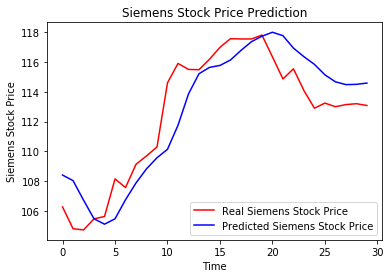

In [22]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Siemens Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Siemens Stock Price')
plt.title('Siemens Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Siemens Stock Price')
plt.legend()
plt.show()
%matplotlib inline

In [ ]:
# Comments

# Our line, is smoother than the real , and of course it cannot predict 
# sudden changes like for instance day 6 or day 19.  Still, it depicts
# quite well the "trend" of the stock price.